In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [8]:
df=pd.read_csv('C:/Users/md mejbah uddin/Downloads/CypherByte/Iris.csv') 

In [9]:
df.head(5)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [10]:
df=df.drop(columns=['Id']) #Delete Columns "Id''
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [11]:
print(df.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [12]:
#Checking for null values
print(df.isna().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [13]:
df.head(150)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]

In [14]:
df.tail(150)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]

In [15]:
n = len(df[df['Species'] == 'versicolor'])
n1 = len(df[df['Species'] == 'virginica'])
n2 = len(df[df['Species'] == 'setosa'])
print("No of Versicolor in Dataset:",n)
print("No of Virginica in Dataset:",n1)
print("No of Setosa in Dataset:",n2)

No of Versicolor in Dataset: 0
No of Virginica in Dataset: 0
No of Setosa in Dataset: 0


In [16]:
#pai chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

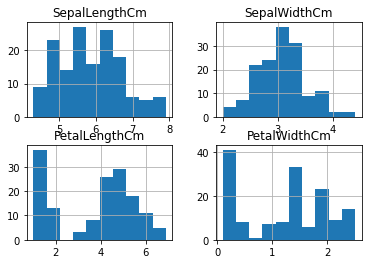

In [17]:
df.hist()
plt.show()

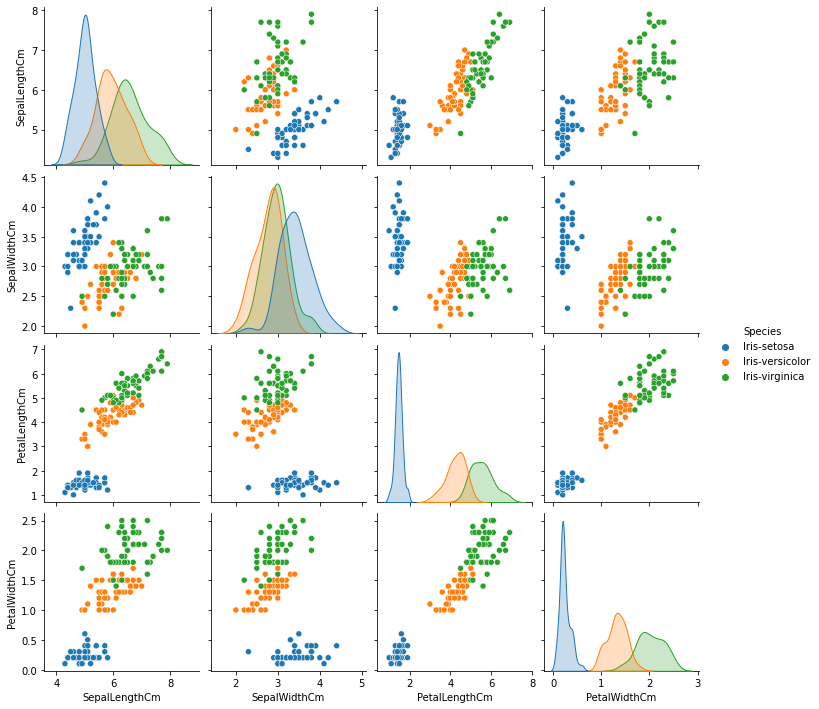

In [18]:
#Pairplot
sns.pairplot(df,hue='Species');

In [19]:
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [20]:
##Target Variable and feture variable

In [21]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y= df['Species']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=4)

In [23]:
print('Train set:', X_train.shape, y_train.shape)

Train set: (120, 4) (120,)


In [24]:
print('Train set:', X_test.shape, y_test.shape)

Train set: (30, 4) (30,)


# SVM

In [25]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


### SVM Cross Validation

In [26]:
scores = cross_val_score(svm_model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the average score and its variance
print("Mean Accuracy: {:.2f}".format(scores.mean()))
print("Score Variance: {:.2f}".format(scores.std()))

Mean Accuracy: 0.97
Score Variance: 0.05


# K Nearest Neighbor (KNN) Classification

In [27]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)
y_pred_knn = KNN_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(knn_accuracy)

0.9666666666666667


### KNN Cross Validation

In [28]:
knn_scores = cross_val_score(KNN_model, X_train, y_train, cv=5)
print("Mean Accuracy: {:.2f}".format(scores.mean()))
print("Score Variance: {:.2f}".format(scores.std()))

Mean Accuracy: 0.97
Score Variance: 0.05


# Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
d_t = DecisionTreeClassifier()
d_t.fit(X_train,y_train)
y_pred = d_t.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


### Decision Tree Cross Validation 

In [31]:
d_t_scores = cross_val_score(d_t, X_train, y_train, cv=5)
print("Mean Accuracy: {:.2f}".format(scores.mean()))
print("Score Variance: {:.2f}".format(scores.std()))

Mean Accuracy: 0.97
Score Variance: 0.05


# SUBMITTED BY-

# MD.MEJBAH UDDIN